In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [8]:
data = pd.read_csv('/content/online_retail_listing.csv',delimiter = ';',encoding='latin-1')
df_1 = data.copy()
df_1.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,"6,95",13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,"2,1",13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,"1,25",13085.0,United Kingdom


In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  object 
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 64.0+ MB


In [10]:
df_1.isna().sum()

,0
Invoice,0
StockCode,0
Description,4372
Quantity,0
InvoiceDate,0
Price,0
Customer ID,236682
Country,0


In [11]:
df_1 = df_1.dropna()
df_1.isna().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


In [12]:
df_1['Price'] = df_1['Price'].str.replace(',','.').astype(float)
df_1['Quantity'] = df_1['Quantity'].astype(int)
df_1['Customer ID'] = df_1['Customer ID'].astype(int)
df_1["Total Price"] = df_1["Quantity"] * df_1["Price"]
df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'],format='%d.%m.%Y %H:%M')
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 811893 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      811893 non-null  object        
 1   StockCode    811893 non-null  object        
 2   Description  811893 non-null  object        
 3   Quantity     811893 non-null  int64         
 4   InvoiceDate  811893 non-null  datetime64[ns]
 5   Price        811893 non-null  float64       
 6   Customer ID  811893 non-null  int64         
 7   Country      811893 non-null  object        
 8   Total Price  811893 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 61.9+ MB


In [13]:
df_1[df_1['Invoice'].str.contains('C')] #Canceled invoices

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321,Australia,-35.40
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321,Australia,-9.90
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia,-17.00
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321,Australia,-12.60
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321,Australia,-35.40
...,...,...,...,...,...,...,...,...,...
1046566,C580313,22649,STRAWBERRY FAIRY CAKE TEAPOT,-3,2011-12-02 15:10:00,4.95,12668,Germany,-14.85
1046567,C580313,22419,LIPSTICK PEN RED,-6,2011-12-02 15:10:00,0.42,12668,Germany,-2.52
1046568,C580313,22303,COFFEE MUG APPLES DESIGN,-2,2011-12-02 15:10:00,2.55,12668,Germany,-5.10
1046569,C580313,21232,STRAWBERRY CERAMIC TRINKET POT,-3,2011-12-02 15:10:00,1.25,12668,Germany,-3.75


In [14]:
df_1[(df_1['Total Price']<=0) | (df_1['Invoice'].str.contains('C'))]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321,Australia,-35.40
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321,Australia,-9.90
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia,-17.00
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321,Australia,-12.60
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321,Australia,-35.40
...,...,...,...,...,...,...,...,...,...
1046566,C580313,22649,STRAWBERRY FAIRY CAKE TEAPOT,-3,2011-12-02 15:10:00,4.95,12668,Germany,-14.85
1046567,C580313,22419,LIPSTICK PEN RED,-6,2011-12-02 15:10:00,0.42,12668,Germany,-2.52
1046568,C580313,22303,COFFEE MUG APPLES DESIGN,-2,2011-12-02 15:10:00,2.55,12668,Germany,-5.10
1046569,C580313,21232,STRAWBERRY CERAMIC TRINKET POT,-3,2011-12-02 15:10:00,1.25,12668,Germany,-3.75


In [15]:
df = df_1[df_1['Total Price']>0]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


## Outliers

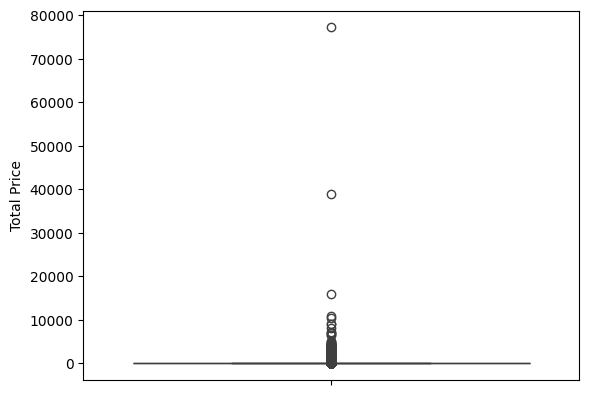

In [16]:
sns.boxplot(data=df, y='Total Price')
plt.show()

In [19]:
q1 = df['Total Price'].quantile(0.25)
q3 = df['Total Price'].quantile(0.75)
iqr = q3 - q1
lower_b = q1 - 1.5*iqr
upper_b = q3 + 1.5*iqr

df = df[(df['Total Price'] > lower_b) & (df['Total Price'] < upper_b)]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom,39.60
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085,United Kingdom,30.60
10,489435,22195,HEART MEASURING SPOONS LARGE,24,2009-12-01 07:46:00,1.65,13085,United Kingdom,39.60
...,...,...,...,...,...,...,...,...,...
1048570,580501,23284,DOORMAT KEEP CALM AND COME IN,2,2011-12-04 13:00:00,8.25,14546,United Kingdom,16.50
1048571,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,2011-12-04 13:00:00,4.95,14546,United Kingdom,14.85
1048572,580502,22469,HEART OF WICKER SMALL,3,2011-12-04 13:15:00,1.65,16931,United Kingdom,4.95
1048573,580502,23489,VINTAGE BELLS GARLAND,2,2011-12-04 13:15:00,2.89,16931,United Kingdom,5.78


In [21]:
df.reset_index(drop=True,inplace=True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price
0,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
1,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom,39.60
2,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
3,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085,United Kingdom,30.60
4,489435,22195,HEART MEASURING SPOONS LARGE,24,2009-12-01 07:46:00,1.65,13085,United Kingdom,39.60
...,...,...,...,...,...,...,...,...,...
727861,580501,23284,DOORMAT KEEP CALM AND COME IN,2,2011-12-04 13:00:00,8.25,14546,United Kingdom,16.50
727862,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,2011-12-04 13:00:00,4.95,14546,United Kingdom,14.85
727863,580502,22469,HEART OF WICKER SMALL,3,2011-12-04 13:15:00,1.65,16931,United Kingdom,4.95
727864,580502,23489,VINTAGE BELLS GARLAND,2,2011-12-04 13:15:00,2.89,16931,United Kingdom,5.78


In [22]:
df.nunique()

,0
Invoice,32798
StockCode,4585
Description,5225
Quantity,113
InvoiceDate,30937
Price,276
Customer ID,5659
Country,41
Total Price,1194


In [24]:
today = df['InvoiceDate'].max()
today

Timestamp('2011-12-04 13:15:00')

In [31]:
r = (today-df.groupby('Customer ID')['InvoiceDate'].max()).dt.days
f = df.groupby('Customer ID')['Invoice'].count()
m = df.groupby('Customer ID')['Total Price'].sum()
rfm = pd.DataFrame({'Recency':r,'Frequency':f,'Monetary':m})
rfm

,Recency,Frequency,Monetary
Customer ID,,,
12346,523,32,327.86
12347,34,227,4189.48
12348,70,33,573.24
12349,13,159,2843.99
12350,304,17,334.40
...,...,...,...
18283,4,936,2528.65
18284,426,27,411.68
18285,655,10,173.00


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

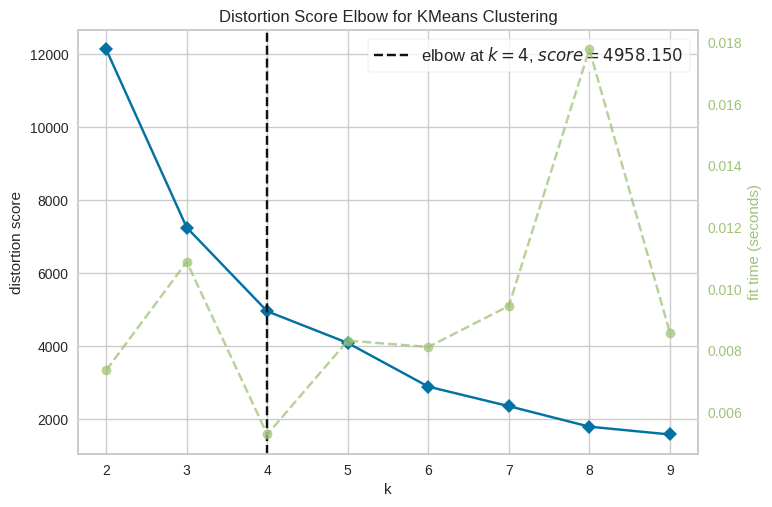

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model,k=(2,10))
visualizer.fit(rfm_scaled)
visualizer.show()

In [45]:
model1 = KMeans(n_clusters=4,init = 'k-means++')
kfit = model1.fit(rfm_scaled)
labels = kfit.labels_

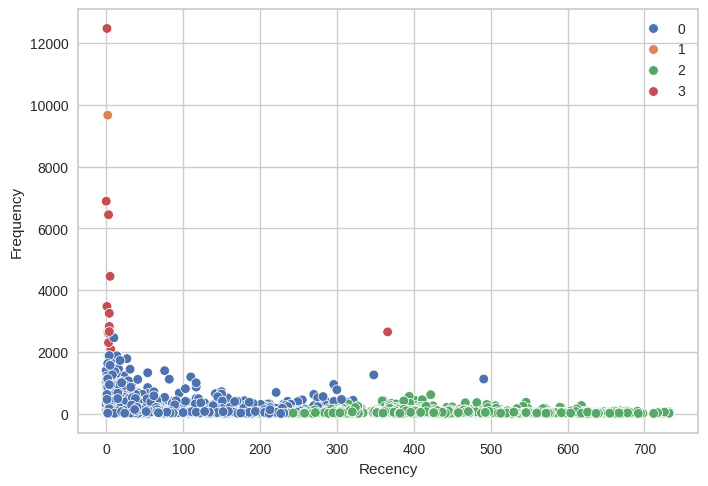

In [48]:
sns.scatterplot(data=rfm,x='Recency',y='Frequency',hue=labels,palette ='deep')
plt.show()

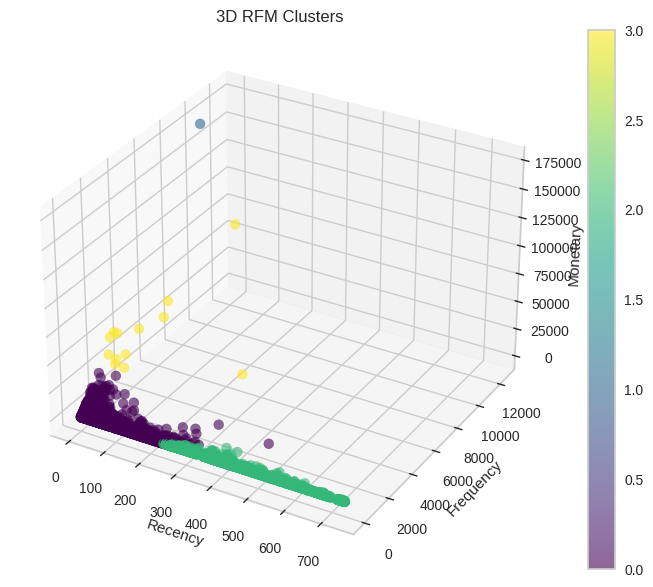

In [53]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    rfm['Recency'],
    rfm['Frequency'],
    rfm['Monetary'],
    c=labels,
    cmap='viridis',
    s=50,
    alpha=0.6
    )
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D RFM Clusters')

plt.colorbar(sc)
plt.show()

In [54]:
rfm['Labels'] = labels
rfm

,Recency,Frequency,Monetary,Labels
Customer ID,,,,
12346,523,32,327.86,2
12347,34,227,4189.48,0
12348,70,33,573.24,0
12349,13,159,2843.99,0
12350,304,17,334.40,2
...,...,...,...,...
18283,4,936,2528.65,0
18284,426,27,411.68,2
18285,655,10,173.00,2


In [58]:
rfm['Cluster'] = labels
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})

print(cluster_summary)

            Recency    Frequency       Monetary
Cluster                                        
0         65.380358   157.800597    1922.019486
1          2.000000  9667.000000  173713.420000
2        453.540071    41.788157     482.684713
3         30.923077  4206.384615   37178.494615


# Statistical test for Cluster Differences

### Homogenity of Variance

In [87]:
import pingouin as pg

columns = ['Recency', 'Frequency', 'Monetary']
for col in columns:
    result = pg.homoscedasticity(rfm, dv=col, group='Cluster', center='mean')
    print(f"Homoscedasticity test for {col}:")
    print(result)


Homoscedasticity test for Recency:
                 W           pval  equal_var
levene  419.196243  6.723225e-246      False
Homoscedasticity test for Frequency:
                 W  pval  equal_var
levene  794.524525   0.0      False
Homoscedasticity test for Monetary:
                 W           pval  equal_var
levene  474.411779  5.894755e-275      False


### Manova - Multivariate Differences

In [88]:
from statsmodels.multivariate.manova import MANOVA

model = MANOVA.from_formula('Recency + Frequency + Monetary ~ Cluster', data=rfm)
print(model.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.6046 3.0000 5655.0000 1232.5852 0.0000
         Pillai's trace 0.3954 3.0000 5655.0000 1232.5852 0.0000
 Hotelling-Lawley trace 0.6539 3.0000 5655.0000 1232.5852 0.0000
    Roy's greatest root 0.6539 3.0000 5655.0000 1232.5852 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        Cluster         Value  Num DF   Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.2124 3.0000 5655.0000 6991.8372 0.0000
         Pillai's trace 0.7876 3.0000 5655.00

#### The MANOVA results show that there are significant differences between the clusters in terms of the Recency, Frequency, and Monetary variables.

### Post-hoc tests help to determine which individual clusters have significant differences on each dependent variable (Recency, Frequency, Monetary).

In [93]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for col in ['Recency', 'Frequency', 'Monetary']:
    model = ols(f'{col} ~ Cluster', data=rfm).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f'ANOVA results for {col}:')
    print(anova_table)
    print("\n")
    if anova_table['PR(>F)'].iloc[0] < 0.05:
        print(f'\nPost-hoc Tukey HSD for {col}:')
        tukey = pairwise_tukeyhsd(rfm[col], rfm['Cluster'])
        print(tukey.summary())
    else:
        print(f'\nNo significant differences for {col} between clusters.')
    print("\n" + "="*50 + "\n")


ANOVA results for Recency:
                sum_sq      df             F  PR(>F)
Cluster   1.882069e+08     1.0  19900.358072     0.0
Residual  5.350088e+07  5657.0           NaN     NaN



Post-hoc Tukey HSD for Recency:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     0      1 -63.3804 0.9033 -301.5682  174.8075  False
     0      2 388.1597    0.0  381.5009  394.8185   True
     0      3 -34.4573 0.5385 -100.6261   31.7116  False
     1      2 451.5401    0.0  213.3237  689.7564   True
     1      3  28.9231 0.9906 -218.2226  276.0688  False
     2      3 -422.617    0.0 -488.8883 -356.3457   True
--------------------------------------------------------


ANOVA results for Frequency:
                sum_sq      df          F        PR(>F)
Cluster   5.681038e+06     1.0  53.393424  3.108669e-13
Residual  6.019024e+08  5657.0        NaN           NaN



Post-ho

### There are significant differences between clusters in Recency, Frequency, and Monetary across the various clusters, based on both ANOVA and Tukey HSD tests